# Sentence Classification - Toxic Comments - Classical ML

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import re

import string     # Imports the library
import nltk        # Imports the natural language toolkit
from nltk.corpus import stopwords

nltk.download('stopwords')   # Download the stopwords dataset
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rober\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#

Num GPUs Available:  1


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
#tfds.list_builders()

### Load Text Data Sets

#### TensorFlow - Wikipedia Toxicity Subtypes

In [4]:
import time
t_start = time.time()

dss, infoo = tfds.load('wikipedia_toxicity_subtypes', split='train', with_info=True)
df_train_wiki_tox =tfds.as_dataframe(dss, infoo)

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 18.820 seconds


#### TensorFlow DataSet - Civil Comments

In [5]:
# #https://www.tensorflow.org/datasets/overview
# import time
# t_start = time.time()

# ds, info = tfds.load('civil_comments', split='train', with_info=True)
# df_train_Civil_Comments =tfds.as_dataframe(ds, info)

# t_stop = time.time()
# print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

In [6]:
#df_train_Civil_Comments.describe()
#df_train_Civil_Comments.head(66)

#### TensorFlow DataSet - reddit

In [7]:
#https://www.tensorflow.org/datasets/overview
#reddit, reddit_disentanglement, reddit_tifu
# import time
# t_start = time.time()

# dsss, infooo = tfds.load('reddit', split='train', with_info=True)
# df_train_reddit =tfds.as_dataframe(dsss, infooo)

# t_stop = time.time()
# print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

### EDA and Comment Text Cleansing

In [8]:
def text_process_1(text):
    text=text.decode('utf-8')
    
    # Replace the xa0 with a space
    text=text.replace('xa0',' ')
    # Replace the \xa0 with a space
    text=text.replace('\xa0',' ')
    # Replace the \n\n with a space
    text=text.replace('\n\n',' ')
    # Replace the \n with a space
    text=text.replace('\n',' ')
    # Replace apostrophes with nothing
    text=text.replace('\'','')
    # Replace http with a space
    text=text.replace('http','')
    
    # Replace hyphens with a space
    text=text.replace('-','')
    
    tokens = nltk.word_tokenize(text)
    
    cleaned_words=[w.lower() for w in tokens if w.isalnum()]
    #remove any words that are actually digits. 
    no_integers = [x for x in cleaned_words if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    
    
    # The code for removing stopwords
    stoplist = stopwords.words('english') 
    stoplist = set(stoplist)
    
    No_StopWords = [word for word in no_integers if word.lower() not in stoplist ]
    
    No_StopWords = ' '.join(No_StopWords)
    
    return No_StopWords

In [9]:
df_train_wiki_tox.head()

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity
0,0.0,0.0,0.0,0.0,"b'""\nThanks Xeno. - \xe2\x80\xa2 Talk \xe2\x8...",0.0,0.0
1,0.0,0.0,0.0,0.0,"b'2009 (UTC)\nFixed 03:36, 8 June'",0.0,0.0
2,0.0,0.0,0.0,0.0,b'Question\nWhat was wrong with the repair I d...,0.0,0.0
3,0.0,0.0,0.0,0.0,"b""I agree myself now, actually. (Amazing how t...",0.0,0.0
4,0.0,0.0,0.0,0.0,b'Kisumu \n\nI saw that you contributed to Kis...,0.0,0.0


In [10]:
import time
t_start = time.time()

df_train_wiki_tox['clean']=df_train_wiki_tox['text'].apply(lambda x: text_process_1(x))


t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 88.970 seconds


In [11]:
df_train_wiki_tox.head()

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean
0,0.0,0.0,0.0,0.0,"b'""\nThanks Xeno. - \xe2\x80\xa2 Talk \xe2\x8...",0.0,0.0,thanks xeno talk
1,0.0,0.0,0.0,0.0,"b'2009 (UTC)\nFixed 03:36, 8 June'",0.0,0.0,utc fixed june
2,0.0,0.0,0.0,0.0,b'Question\nWhat was wrong with the repair I d...,0.0,0.0,question wrong repair
3,0.0,0.0,0.0,0.0,"b""I agree myself now, actually. (Amazing how t...",0.0,0.0,agree actually amazing deniars cant admit mist...
4,0.0,0.0,0.0,0.0,b'Kisumu \n\nI saw that you contributed to Kis...,0.0,0.0,kisumu saw contributed kisumu wondering whethe...


In [12]:
df_train_wiki_tox.iloc[0]['text']

b'"\nThanks Xeno. -  \xe2\x80\xa2 Talk \xe2\x80\xa2 "'

#### Print 10 Random Non-Toxic Comments

In [13]:
import random

df_non_tox = df_train_wiki_tox[df_train_wiki_tox['toxicity']==0]
df_non_tox = df_non_tox.reset_index()


for i in range(10):
    
    n=random.randint(1,df_non_tox.shape[0])
    print(n)
    orig_cmt = df_non_tox['text'][n]
    clean_cmt = df_non_tox['clean'][n]
    print(clean_cmt)
    print('...')
    print(orig_cmt)
    print('\n')

70327
response bdukes question think become difficult wikipedia say anything general guiding girl scouting someone always point guides boys fair point think become overdone take look wagggs website girls girls boys say world association girl guides girl scouts worldwide movement providing nonformal education girls young women develop leadership life skills selfdevelopment challenge adventure catchphrase starts girls worldwide say wagggs felt necessary change name dont realise wagggs member organisations take boys taking boys anomaly norm anomaly shouldnt ignore get wrapped
...
b'"\n\nIn response to Bduke\'s question 2 above, I think that it has become very difficult on wikipedia to say anything general about Guiding and Girl Scouting because someone will always point out that some Guides are boys. This is a fair point, but I think it has become overdone. If you take a look at the WAGGGS website, it\'s all about girls. Not girls and a few boys. They say of themselves ""The World Associa

#### Print 10 Random Toxic Comments

In [14]:
df_toxic = df_train_wiki_tox[df_train_wiki_tox['toxicity']==1]
print(df_toxic['text'][10])
print(df_toxic['clean'][10])

b'Not\n\na Goddamned thing, if you dont like it, its becouse you suck big fat elepant dicks-AppoloBitch'
goddamned thing dont like becouse suck big fat elepant dicksappolobitch


In [15]:
df_tox = df_train_wiki_tox[df_train_wiki_tox['toxicity']==1]
df_tox = df_tox.reset_index()


for i in range(10):
    
    n=random.randint(1,df_tox.shape[0])
    print(n)
    orig_cmt = df_tox['text'][n]
    rnd_cmt = df_tox['clean'][n]
    print(rnd_cmt)
    print('...')
    print(orig_cmt)
    print('\n')

13302
gay guy know wuzzup like sadomasochism gim
...
b'The Gay Guy \n\nI know you.  Wuzzup?  I like sadomasochism.  Gimme more!'


7441
lolz try harder plz comedrinker
...
b'lolz \n\ntry harder plz? ComeDrinker'


5623
october saw evil edit thomas magic railroad assigned correctyourediting school stop stupid edits else blocked editing
...
b'"== October 2009 ==\n\nI saw your evil edit to Thomas and the Magic Railroad and you will be assigned to ""correct-your-editing"" school. Stop your stupid\nedits or else you will be blocked from editing by a sysop.   "'


1675
fox platform article someones dream crap little research ford mustangs posting
...
b"This Fox platform article is someone's a dream up crap.. do a little research on Ford and Mustangs before posting."


4105
movie partially based graham hancocks book fingerprints gods credits resorted even removing suggestions discussion page jack straw two pathetic page still sucks stupidity rules shii called member one religion tries kill ev

### Create Final Training Data set of comments greater than 5 words and less than 300 words

In [16]:
import time
t_start = time.time()

df_train_wiki_tox['wd_len']=df_train_wiki_tox['clean'].apply(lambda x: len(nltk.word_tokenize(x)))



t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 20.400 seconds


#### Distribution plot of word Lengths by Toxicity Label

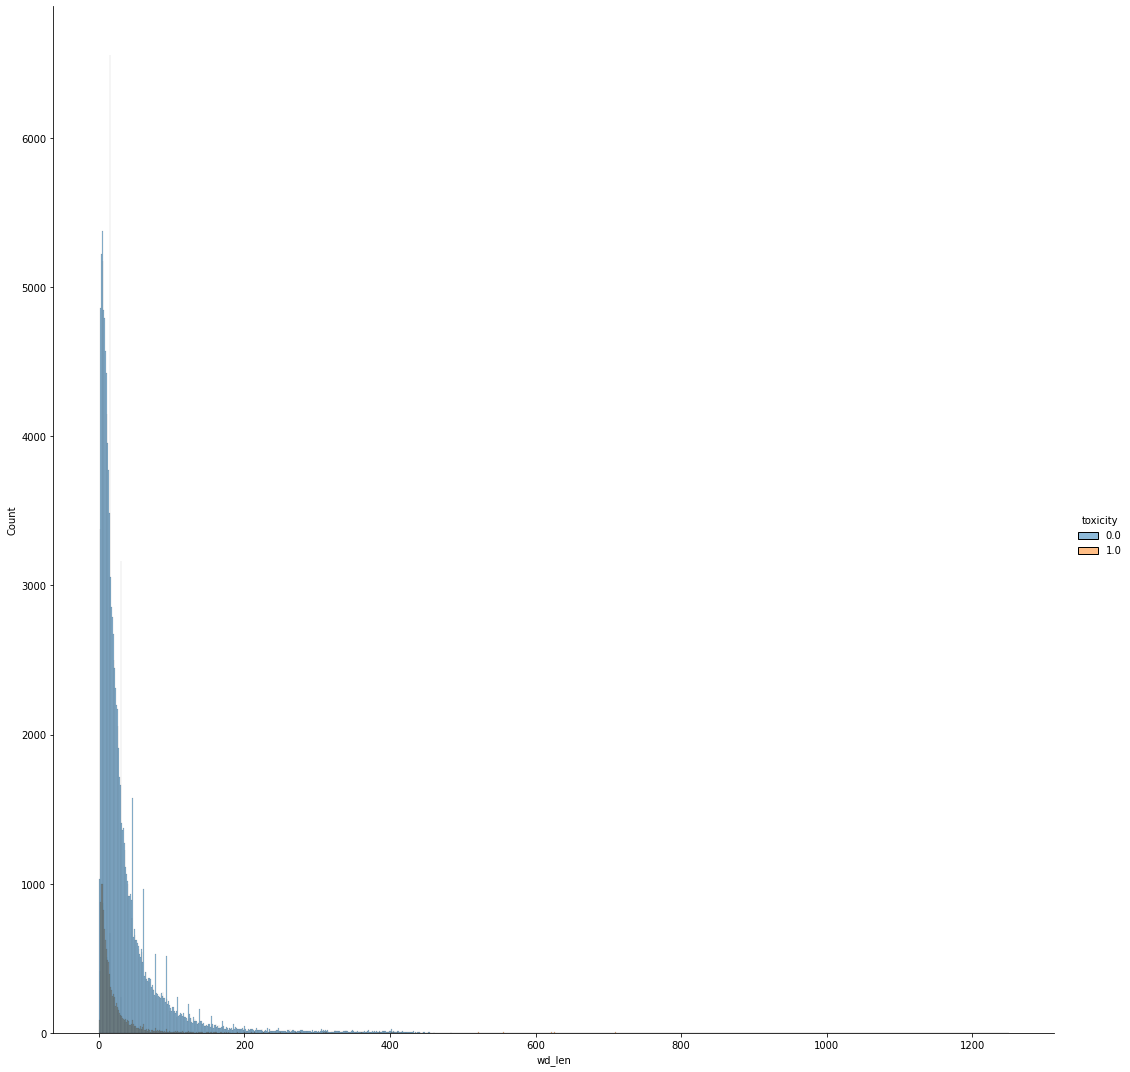

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#fig, ax = plt.subplots(figsize=(8,6))
a=sns.displot(df_train_wiki_tox, x="wd_len", hue="toxicity", height=15, aspect=1,)
#sns.distplot(data["Trip_distance"], bins= 50, kde= False, axlabel= "Trip Distance", ax= ax)
#a.set_ylabel('Count')


#set_titles("{col_name} penguins")

#### Look at comments with Greater than 1000 words

In [18]:
df_train_wiki_tox['wd_len'].sort_values(ascending=False)

6070      1250
140797    1250
106288    1250
135934    1250
152278    1247
          ... 
101217       0
78041        0
117542       0
42685        0
117637       0
Name: wd_len, Length: 159571, dtype: int64

In [19]:
df_train_wiki_tox[df_train_wiki_tox['wd_len']>1000]

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean,wd_len
6070,0.0,0.0,0.0,0.0,b'OH NOES OH NOES OH NOES OH NOES OH NOES OH N...,0.0,0.0,oh noes oh noes oh noes oh noes oh noes oh noe...,1250
59895,0.0,1.0,0.0,0.0,b'hi moron hi moron hi moron hi moron hi moron...,0.0,1.0,hi moron hi moron hi moron hi moron hi moron h...,1078
106288,0.0,0.0,0.0,0.0,b'LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL LOL ...,0.0,0.0,lol lol lol lol lol lol lol lol lol lol lol lo...,1250
117897,0.0,0.0,0.0,0.0,b'Sex sex sex sex Sex sex sex sexSex sex sex s...,0.0,1.0,sex sex sex sex sex sex sex sexsex sex sex sex...,1001
130989,1.0,1.0,1.0,0.0,b'THAT WAS REALLY MILLESECONDS WASNT IT BITCH ...,0.0,1.0,really milleseconds wasnt bitch fat jew fat je...,1235
135934,0.0,0.0,0.0,0.0,b'DIE FAG DIE FAG DIE FAG DIE FAG DIE FAG DIE ...,0.0,1.0,die fag die fag die fag die fag die fag die fa...,1250
140797,0.0,0.0,0.0,0.0,b'PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG PIG ...,0.0,1.0,pig pig pig pig pig pig pig pig pig pig pig pi...,1250
152278,1.0,1.0,0.0,0.0,b'FAT JEW FAT JEW FAT JEW FAT JEW FAT JEW FAT ...,0.0,1.0,fat jew fat jew fat jew fat jew fat jew fat je...,1247


#### Look at those toxic comments with less than 5 words

In [20]:
df_train_wiki_tox[(df_train_wiki_tox['wd_len']<=4) & (df_train_wiki_tox['toxicity']==1)]

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean,wd_len
138,1.0,1.0,1.0,0.0,"b""OhnoitsJamie, you're a faggot. What do you t...",0.0,1.0,ohnoitsjamie youre faggot think,4
161,0.0,0.0,0.0,0.0,b'SO ALL BLACKS ARE VANDALISTS NOW HUH????',0.0,1.0,blacks vandalists huh,3
239,0.0,1.0,1.0,0.0,b'Fuck off you persistant faggot. - God',0.0,1.0,fuck persistant faggot god,4
273,0.0,0.0,0.0,0.0,b'I hate you? I hate you!',0.0,1.0,hate hate,2
369,0.0,0.0,0.0,0.0,"b'Whatever, you p\xc3\xafece of cr@p!'",0.0,1.0,whatever pïece cr p,4
...,...,...,...,...,...,...,...,...,...
159287,0.0,1.0,1.0,0.0,b'SUCK YOU SUCK YOU SUCK',0.0,1.0,suck suck suck,3
159316,0.0,0.0,1.0,0.0,b'P ==\n\n E \n\n N \n\n I \n\n S \n\n==',0.0,1.0,p e n,3
159398,0.0,0.0,0.0,0.0,b'Be careful who you call a moron.',0.0,1.0,careful call moron,3
159433,0.0,1.0,0.0,0.0,"b'It is a shame what people are here, I am dis...",0.0,1.0,shame people disgusting,3


In [21]:
df_train_wiki_tox.iloc[159316]['text']

b'P ==\n\n E \n\n N \n\n I \n\n S \n\n=='

#### Distribution plot of comments less than 200 words by Toxicity Label

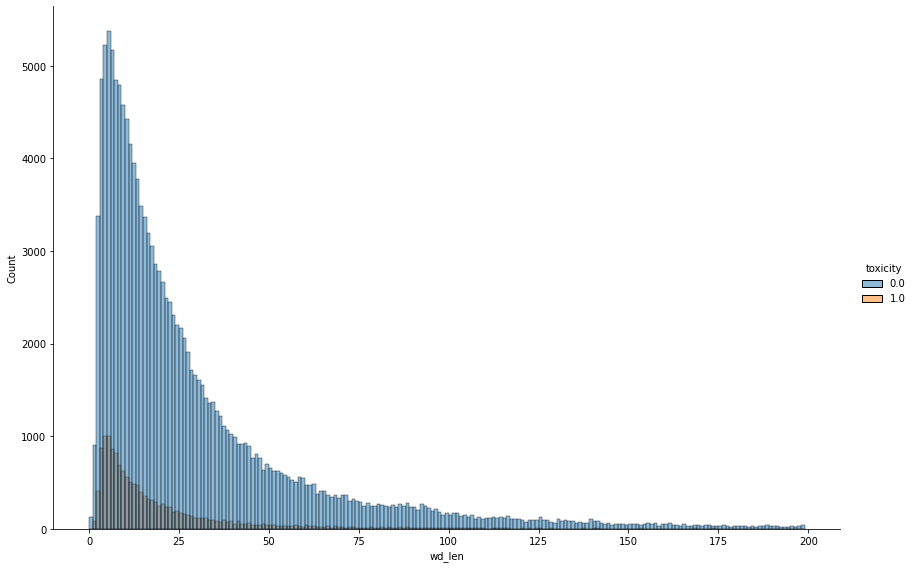

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df_train_wiki_tox[df_train_wiki_tox['wd_len']<200], x="wd_len", hue="toxicity", height=8, aspect=1.5)

#### Distribution plot of comments less than 50 words by Toxicity Label

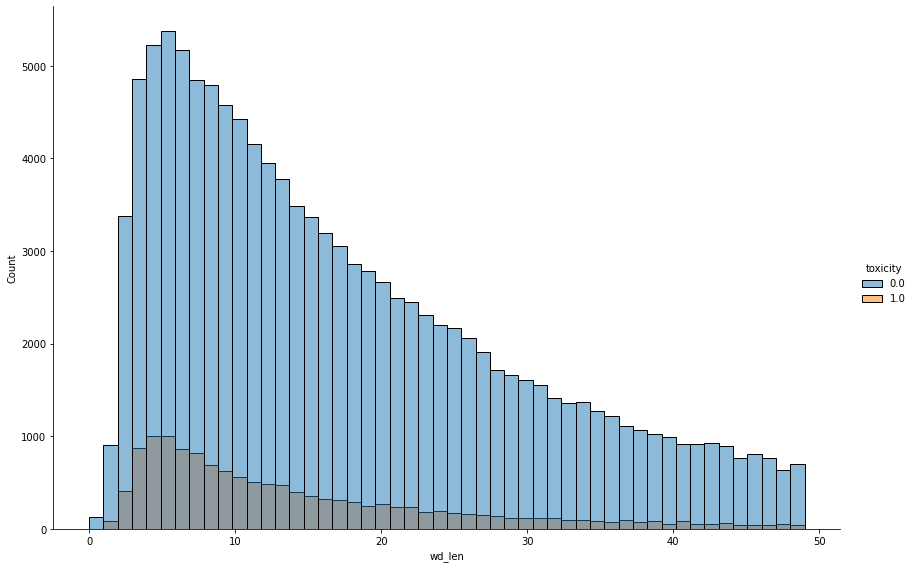

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.displot(df_train_wiki_tox[df_train_wiki_tox['wd_len']<50], x="wd_len", hue="toxicity", height=8, aspect=1.5, bins=50)

#### Distribution plot of comments less than 50 words and greater than 5 by Toxicity Label

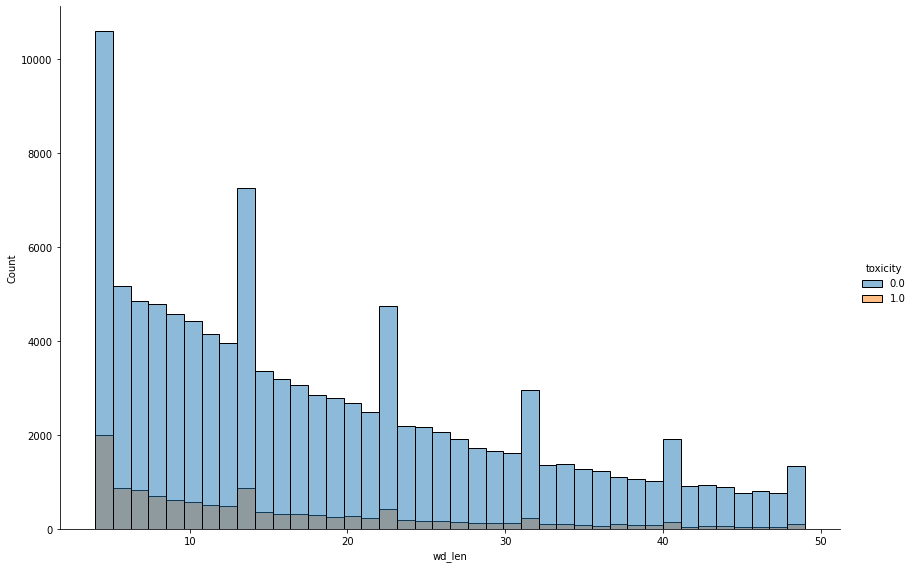

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.displot(df_train_wiki_tox[(df_train_wiki_tox['wd_len']<50) & (df_train_wiki_tox['wd_len']>=4)], 
            x="wd_len", hue="toxicity", height=8, aspect=1.5, bins=40)

#### Approximately 12,000 toxic comments after filtering for word length

In [25]:
df_small=df_train_wiki_tox[(df_train_wiki_tox['wd_len']<50) & (df_train_wiki_tox['wd_len']>=4)]
df_small[df_small['toxicity']==1].describe()

,identity_attack,insult,obscene,severe_toxicity,threat,toxicity,wd_len
count,12322.000000,12322.000000,12322.000000,12322.000000,12322.000000,12322.0,12322.000000
mean,0.086268,0.487096,0.519396,0.100308,0.030677,1.0,15.128794
std,0.280771,0.499854,0.499644,0.300423,0.172448,0.0,10.719231
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,12.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,21.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,49.000000


#### Convert Categorical Variables with LabelEncoder

In [26]:
from sklearn import preprocessing
# instatiate sklearn's labelencoder
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
df_small['new_toxicity'] = le.fit_transform(df_small['toxicity'].values)
df_small['new_toxicity'].value_counts()
#df_3.pop('Results')

<ipython-input-26-133a14ed500e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['new_toxicity'] = le.fit_transform(df_small['toxicity'].values)


0    108011
1     12322
Name: new_toxicity, dtype: int64

### Random Under Sample Majority Class with Imbalance-Learn

In [27]:
#pip install imbalanced-learn

In [28]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [29]:
df_small.head(5)

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean,wd_len,new_toxicity
3,0.0,0.0,0.0,0.0,"b""I agree myself now, actually. (Amazing how t...",0.0,0.0,agree actually amazing deniars cant admit mist...,7,0
5,0.0,0.0,0.0,0.0,b'Asian Supremacy\nYou voted to delete the art...,0.0,0.0,asian supremacy voted delete article asian sup...,15,0
8,0.0,0.0,0.0,0.0,b'Please stop. If you continue spamming you wi...,0.0,0.0,please stop continue spamming blocked editing ...,7,0
10,0.0,0.0,0.0,0.0,"b'Not\n\na Goddamned thing, if you dont like i...",0.0,1.0,goddamned thing dont like becouse suck big fat...,10,1
13,1.0,1.0,0.0,0.0,"b""Singing is one thing, but you also need to s...",0.0,1.0,singing one thing also need show youre smart p...,12,1


In [30]:
#https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape
X=df_small['clean']
X=X.values.reshape(-1, 1)

Y=df_small['new_toxicity']
Y=Y.values.reshape(-1, 1)

In [31]:
X_under, y_under = undersample.fit_resample(X, Y)
new_x=pd.DataFrame(X_under)[0]
new_y=pd.DataFrame(y_under)[0]

#### Vectorize the comments field

In [32]:
# We will use two different vectorizer and compare the results 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
import time
t_start = time.time()

ngram_vect = CountVectorizer(ngram_range=(1,1))
X_counts = ngram_vect.fit_transform(new_x)

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 0.297 seconds


In [34]:
import time
t_start = time.time()

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
X_tfidf = tfidf.fit_transform(new_x)

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 1.033 seconds


### Attempt to use Word2Vec

#### Loading a Pre Trained Model

In [35]:
import gensim.downloader as api
info_df = pd.DataFrame.from_dict(api.info()['models'], orient='index')
info_df[['file_size', 'base_dataset', 'parameters']]

C:\Users\Rober\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


,file_size,base_dataset,parameters
fasttext-wiki-news-subwords-300,1.005007e+09,"Wikipedia 2017, UMBC webbase corpus and statmt...",{'dimension': 300}
conceptnet-numberbatch-17-06-300,1.225498e+09,"ConceptNet, word2vec, GloVe, and OpenSubtitles...",{'dimension': 300}
word2vec-ruscorpora-300,2.084274e+08,Russian National Corpus (about 250M words),"{'dimension': 300, 'window_size': 10}"
word2vec-google-news-300,1.743564e+09,Google News (about 100 billion words),{'dimension': 300}
glove-wiki-gigaword-50,6.918254e+07,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 50}
glove-wiki-gigaword-100,1.343004e+08,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 100}
glove-wiki-gigaword-200,2.643369e+08,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 200}
glove-wiki-gigaword-300,3.943622e+08,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 300}
glove-twitter-25,1.098850e+08,"Twitter (2B tweets, 27B tokens, 1.2M vocab, un...",{'dimension': 25}
glove-twitter-50,2.092169e+08,"Twitter (2B tweets, 27B tokens, 1.2M vocab, un...",{'dimension': 50}


In [36]:
#model=api.load("fasttext-wiki-news-subwords-300")
model=api.load("glove-twitter-200")
#model=api.load("glove-wiki-gigaword-300")

#### For each comment, Find Number of w2v vector embbeddings.
    - Glove-twitter-25 giving division by 0 error when trying to average
    - if Word isn't in a Glove Embedding Vocab list, error may be thrown

In [37]:
def w2v_count(text):
    #n=int(len(text)/4)
    #n=10
    n=len(text)
    text_1=text[0:n]
    vectors = [model[x] for x in text_1.split(' ') if x in model.key_to_index]
    vec_count=len(vectors)
    return vec_count

In [38]:
import time
t_start = time.time()

df_small['w2v_count']=df_small['clean'].apply(lambda x: w2v_count(x))


t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 2.123 seconds


<ipython-input-38-561d571c66b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['w2v_count']=df_small['clean'].apply(lambda x: w2v_count(x))


In [39]:
df_small.head(5)

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean,wd_len,new_toxicity,w2v_count
3,0.0,0.0,0.0,0.0,"b""I agree myself now, actually. (Amazing how t...",0.0,0.0,agree actually amazing deniars cant admit mist...,7,0,6
5,0.0,0.0,0.0,0.0,b'Asian Supremacy\nYou voted to delete the art...,0.0,0.0,asian supremacy voted delete article asian sup...,15,0,13
8,0.0,0.0,0.0,0.0,b'Please stop. If you continue spamming you wi...,0.0,0.0,please stop continue spamming blocked editing ...,7,0,7
10,0.0,0.0,0.0,0.0,"b'Not\n\na Goddamned thing, if you dont like i...",0.0,1.0,goddamned thing dont like becouse suck big fat...,10,1,8
13,1.0,1.0,0.0,0.0,"b""Singing is one thing, but you also need to s...",0.0,1.0,singing one thing also need show youre smart p...,12,1,12


In [40]:
df_small=df_small[~(df_small['w2v_count']==0)]

df_small[df_small['w2v_count']==0]

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean,wd_len,new_toxicity,w2v_count


In [41]:
df_small[df_small['w2v_count'].isnull()]

,identity_attack,insult,obscene,severe_toxicity,text,threat,toxicity,clean,wd_len,new_toxicity,w2v_count


### Create Sentence Vector for each comment by Averaging the Word Vectors

In [42]:
#average first 30 words in the sentence
def sent_vectorizer_1(text):
    #n=int(len(text)/4)
    n=len(text)
    text_1=text[0:n]
    vectors = [model[x] for x in text_1.split(' ') if x in model.key_to_index]
    #sent_vector=sum(vectors)/len(vectors)
    sent_vector=sum(vectors)/len(vectors)
    return sent_vector

In [43]:
df_glove=pd.DataFrame(X_under)
df_glove.columns=['text']
df_glove

,text
0,see response even shown wrong
1,march utc support consideration im persuaded p...
2,hellogoodbye group fit wp music guidelines see...
3,hard think characterize anime television movies
4,thats extremely generous statement really appr...
...,...
24639,oh shit stop sending warning fucking bitch
24640,hey thnk asshole love fuck momk day bitch stop...
24641,mean say im big fucknig idiot dont know im tal...
24642,hey freaking hermaphrodite please unprotect us...


In [44]:
import time
t_start = time.time()

df_glove['sent_vec_1']=df_glove['text'].apply(lambda x: sent_vectorizer_1(x))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 0.638 seconds


In [45]:
df_glove.head(5)

,text,sent_vec_1
0,see response even shown wrong,"[0.25602293, 0.548796, -0.1334894, 0.1457315, ..."
1,march utc support consideration im persuaded p...,"[-0.21406098, 0.10721781, 0.018127155, 0.07136..."
2,hellogoodbye group fit wp music guidelines see...,"[0.013949432, 0.09732015, -0.19174816, -0.0877..."
3,hard think characterize anime television movies,"[-0.33022836, 0.25121668, -0.14000435, 0.09471..."
4,thats extremely generous statement really appr...,"[-0.0332057, 0.0867291, -0.25914812, 0.2293022..."


In [46]:
df_glove['sent_vec_1'][0].shape

(200,)

#### Creates Data Frame where 1 sentence is 1 Row, with 300 columns

In [47]:
X_glove=df_glove['sent_vec_1']

In [48]:
X_glove

0        [0.25602293, 0.548796, -0.1334894, 0.1457315, ...
1        [-0.21406098, 0.10721781, 0.018127155, 0.07136...
2        [0.013949432, 0.09732015, -0.19174816, -0.0877...
3        [-0.33022836, 0.25121668, -0.14000435, 0.09471...
4        [-0.0332057, 0.0867291, -0.25914812, 0.2293022...
                               ...                        
24639    [-0.0006926571, -0.010100176, -0.17168571, 0.2...
24640    [-0.02970289, 0.07527779, -0.1928437, 0.173557...
24641    [-0.11130978, 0.27983445, -0.22667803, 0.03470...
24642    [0.2741383, 0.20433381, -0.18258347, 0.2004280...
24643    [0.077536255, 0.062970884, -0.41715834, -0.123...
Name: sent_vec_1, Length: 24644, dtype: object

In [49]:
pd.DataFrame(X_glove[1]).T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.214061,0.107218,0.018127,0.071368,-0.117432,0.046965,0.391355,-0.038413,-0.058615,-0.169199,...,0.030161,-0.127712,0.017261,-0.029607,0.163949,-0.05541,0.204772,0.227586,0.100651,-0.155534


In [50]:
import time
t_start = time.time()

ddd=pd.DataFrame()


for idx, row in enumerate(X_glove):
    #print((roww))
    #print(list(roww))
    row_df=pd.Series(X_glove[idx]).to_frame()
    row_df_2=row_df.T
    ddd=pd.concat([ddd, row_df_2])
    #row_df= pd.DataFrame(roww)
#     row_df_2=row_df.T
#     ddd=pd.concat([ddd, row_df_2])
    
t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 60.978 seconds


In [51]:
# import time
# t_start = time.time()

# ddd=pd.DataFrame()


# for roww in X_glove:
#     row_df= pd.DataFrame(roww)
# #     row_df_2=row_df.T
# #     ddd=pd.concat([ddd, row_df_2])
    
# t_stop = time.time()
# print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

In [52]:
# import time
# t_start = time.time()

# ddd=pd.DataFrame()


# for idx, row in enumerate(X_glove):
#     row_df= pd.DataFrame(list(X_glove[idx]))
#     row_df_2=row_df.T
#     ddd=pd.concat([ddd, row_df_2])
    
# t_stop = time.time()
# print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

In [53]:
df_glove_avg=ddd.reset_index()
df_glove_avg.pop('index')
df_glove_avg

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.256023,0.548796,-0.133489,0.145731,-0.269238,0.203628,0.825758,-0.052676,0.088207,0.135616,...,0.144189,0.060836,-0.038994,-0.038041,-0.118163,-0.130914,0.264701,0.232962,-0.158296,0.074786
1,-0.214061,0.107218,0.018127,0.071368,-0.117432,0.046965,0.391355,-0.038413,-0.058615,-0.169199,...,0.030161,-0.127712,0.017261,-0.029607,0.163949,-0.055410,0.204772,0.227586,0.100651,-0.155534
2,0.013949,0.097320,-0.191748,-0.087734,0.010000,0.092650,0.433449,-0.070452,0.025765,-0.059897,...,0.150045,0.069794,-0.013194,-0.192171,-0.082390,0.061117,0.009106,-0.094965,-0.077508,-0.050455
3,-0.330228,0.251217,-0.140004,0.094717,-0.102628,0.207892,0.560136,0.081909,-0.067729,-0.176588,...,0.324535,-0.238284,0.154233,-0.157447,0.274149,-0.103156,0.299821,0.335903,-0.298206,-0.039643
4,-0.033206,0.086729,-0.259148,0.229302,-0.136010,0.171194,0.826041,-0.079200,-0.189213,0.235390,...,-0.238981,0.136882,0.128670,-0.330064,0.165727,-0.069668,0.190101,0.221357,-0.096475,0.075426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24639,-0.000693,-0.010100,-0.171686,0.234525,-0.315118,-0.178255,0.725657,-0.193514,0.021417,0.074256,...,-0.124529,0.011785,-0.042029,-0.174985,0.102043,-0.164421,-0.115038,0.299221,-0.262173,0.164890
24640,-0.029703,0.075278,-0.192844,0.173557,-0.317697,0.027553,0.586033,0.003623,-0.173318,-0.016344,...,-0.188177,-0.019557,0.104378,-0.056509,0.062338,0.004061,0.055333,0.077142,-0.031156,-0.011319
24641,-0.111310,0.279834,-0.226678,0.034706,-0.479491,0.268407,0.595935,0.138169,-0.105890,0.099937,...,-0.125019,-0.144211,-0.039458,-0.199564,-0.282779,-0.103154,0.082755,0.166261,-0.223747,-0.039260
24642,0.274138,0.204334,-0.182583,0.200428,-0.144160,-0.275146,0.735209,-0.091255,0.057478,-0.122834,...,0.041739,0.152065,0.223568,0.031745,0.009557,-0.285519,0.048324,0.079253,0.162412,-0.212603


### Import necessary Sci Kit Learn tools and models 

In [54]:
# import necessary tools and models 
import seaborn as sns
import matplotlib.pyplot as plt 

import sklearn.model_selection as cv
from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#### count vectorizer and tf-idf - separate train - test data 

In [55]:
# separate train - test data 
X_train_count, X_test_count, y_train_count, y_test_count = cv.train_test_split(X_counts, new_y,test_size=0.3)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = cv.train_test_split(X_tfidf, new_y,test_size=0.3)

#### Glove_twitter_200 - separate train - test data  

In [56]:
# separate train - test data 
X_train_g200, X_test_g200, y_train_g200, y_test_g200 = cv.train_test_split(df_glove_avg, new_y,test_size=0.3)

In [57]:
X_train_g200.head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
14539,-0.155388,-0.028550,0.080992,0.098197,-0.239538,-0.103675,0.633023,0.013386,-0.149904,0.042774,...,-0.180187,-0.097633,-0.024490,-0.013727,0.195070,-0.226349,0.024500,0.179037,-0.472310,-0.035736
1785,0.075912,0.015900,-0.088552,0.057448,-0.058147,-0.051739,0.584067,-0.170541,-0.012940,-0.171898,...,-0.047185,-0.120478,-0.054281,-0.028379,-0.160569,-0.170509,0.188436,0.218891,0.047601,-0.090245
13308,-0.011421,0.016827,-0.054947,-0.111022,-0.213810,0.018195,0.576860,0.009050,0.206444,0.030811,...,0.061470,-0.034180,-0.005259,-0.055378,0.350391,-0.199795,-0.022791,0.064306,-0.346736,0.101325
21137,-0.172435,0.115570,-0.002855,0.211503,-0.234628,0.111648,0.719515,0.078101,-0.131696,0.155718,...,-0.149831,0.103369,-0.439345,-0.301483,-0.167592,-0.037520,0.206848,0.128153,-0.156917,0.045826
11611,0.094686,0.205950,-0.247784,0.063700,-0.108464,0.134081,0.734314,-0.053308,0.130628,0.055416,...,0.086618,0.093148,0.000201,-0.101456,0.205325,-0.152134,0.111463,0.192653,0.118144,-0.049623


In [58]:
X_train_g200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17250 entries, 14539 to 18880
Columns: 200 entries, 0 to 199
dtypes: float32(200)
memory usage: 13.3 MB


#### Naive Bayes Classifier with Glove_twitter_200

In [59]:
# import time
# t_start = time.time()

# # Instantiate NB
# nb_g200 = MultinomialNB()
# # Fit NB to the training set
# nb_g200.fit(X_train_g200,y_train_g200)
# # Predict Pass or Fail inspect 
# y_pred_g200 = nb_g200.predict(X_test_g200)

# # Predict probabilities
# # probs = nb_count.predict_proba(X_test_count)

# # Print the ROC curve, classification report and confusion matrix
# # print(roc_auc_score(y_test_count, probs[:,1]))
# print(classification_report(y_test_g200, y_pred_g200))
# print(confusion_matrix(y_test_g200, y_pred_g200))

# t_stop = time.time()
# print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

#### Naive Bayes Classifier with count vectorizer

In [60]:
import time
t_start = time.time()

# Instantiate NB
nb_count = MultinomialNB()
# Fit NB to the training set
nb_count.fit(X_train_count,y_train_count)
# Predict Pass or Fail inspect 
y_pred_count = nb_count.predict(X_test_count)

# Predict probabilities
# probs = nb_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_count, y_pred_count))
print(confusion_matrix(y_test_count, y_pred_count))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3657
           1       0.87      0.90      0.89      3737

    accuracy                           0.88      7394
   macro avg       0.89      0.88      0.88      7394
weighted avg       0.89      0.88      0.88      7394

[[3163  494]
 [ 358 3379]]
Time elapsed: 0.017 seconds


#### Naive Bayes Classifier with tfidf

In [61]:
from sklearn.naive_bayes import MultinomialNB
# Instantiate NB
nb_tfidf = MultinomialNB()
# Fit NB to the training set
nb_tfidf.fit(X_train_tfidf,y_train_tfidf)
# Predict Pass or Fail inspect 
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Predict probabilities
#probs = nb_tfidf.predict_proba(X_test_tfidf)

# Print the ROC curve, classification report and confusion matrix
#print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3656
           1       0.88      0.87      0.88      3738

    accuracy                           0.88      7394
   macro avg       0.88      0.88      0.88      7394
weighted avg       0.88      0.88      0.88      7394

[[3204  452]
 [ 470 3268]]


#### Logistic Regression with Glove_twitter_200

In [62]:
import time
t_start = time.time()

# Instantiate LR with count vectorizer
lr_g200 = LogisticRegression(random_state=0, max_iter=2000)
# Fit LR to the training set
lr_g200.fit(X_train_g200,y_train_g200)
# Predict Pass or Fail inspect 
y_pred_g200 = lr_g200.predict(X_test_g200)

# Predict probabilities
# probs = lr_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_g200, y_pred_g200))
print(confusion_matrix(y_test_g200, y_pred_g200))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3675
           1       0.89      0.87      0.88      3719

    accuracy                           0.88      7394
   macro avg       0.88      0.88      0.88      7394
weighted avg       0.88      0.88      0.88      7394

[[3283  392]
 [ 466 3253]]
Time elapsed: 0.412 seconds


#### Logistic Regression with count vectorizer

In [63]:
import time
t_start = time.time()

# Instantiate LR with count vectorizer
lr_count = LogisticRegression(random_state=0, max_iter=2000)
# Fit LR to the training set
lr_count.fit(X_train_count,y_train_count)
# Predict Pass or Fail inspect 
y_pred_count = lr_count.predict(X_test_count)

# Predict probabilities
# probs = lr_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_count, y_pred_count))
print(confusion_matrix(y_test_count, y_pred_count))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3657
           1       0.92      0.87      0.89      3737

    accuracy                           0.90      7394
   macro avg       0.90      0.90      0.90      7394
weighted avg       0.90      0.90      0.90      7394

[[3375  282]
 [ 489 3248]]
Time elapsed: 0.334 seconds


#### Logistic Regression with tfidf

In [64]:
import time
t_start = time.time()

# Instantiate LR with tfidf
lr_tfidf = LogisticRegression(random_state=0, max_iter=3000)
# Fit LR to the training set
lr_tfidf.fit(X_train_tfidf,y_train_tfidf)
# Predict Pass or Fail inspect 
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# Predict probabilities
#probs = lr_tfidf.predict_proba(X_test_tfidf)

# Print the ROC curve, classification report and confusion matrix

#print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_tfidf))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3656
           1       0.91      0.84      0.87      3738

    accuracy                           0.88      7394
   macro avg       0.88      0.88      0.88      7394
weighted avg       0.88      0.88      0.88      7394

[[3347  309]
 [ 597 3141]]
Time elapsed: 0.111 seconds


#### LinearSVC with  Glove_twitter_200

In [65]:
import time
t_start = time.time()

# Instantiate LinearSVC with count vectorizer
svc_g200 = LinearSVC()
# Fit LinearSVC to the training set
svc_g200.fit(X_train_g200,y_train_g200)
# Predict Pass or Fail inspect 
y_pred_g200 = svc_g200.predict(X_test_g200)

# Predict probabilities
# probs = svc_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_g200, y_pred_g200))
print(confusion_matrix(y_test_g200, y_pred_g200))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3675
           1       0.89      0.87      0.88      3719

    accuracy                           0.88      7394
   macro avg       0.88      0.88      0.88      7394
weighted avg       0.88      0.88      0.88      7394

[[3289  386]
 [ 473 3246]]
Time elapsed: 5.150 seconds


C:\Users\Rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### LinearSVC with count vectorizer

In [66]:
import time
t_start = time.time()

# Instantiate LinearSVC with count vectorizer
svc_count = LinearSVC()
# Fit LinearSVC to the training set
svc_count.fit(X_train_count,y_train_count)
# Predict Pass or Fail inspect 
y_pred_count = svc_count.predict(X_test_count)

# Predict probabilities
# probs = svc_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_count, y_pred_count))
print(confusion_matrix(y_test_count, y_pred_count))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3657
           1       0.90      0.87      0.89      3737

    accuracy                           0.89      7394
   macro avg       0.89      0.89      0.89      7394
weighted avg       0.89      0.89      0.89      7394

[[3293  364]
 [ 480 3257]]
Time elapsed: 0.359 seconds


#### LinearSVC with tfidf

In [67]:
import time
t_start = time.time()

svc_tfidf = LinearSVC()
# Fit LR to the training set
svc_tfidf.fit(X_train_tfidf,y_train_tfidf)
# Predict Pass or Fail inspect 
y_pred_tfidf = svc_tfidf.predict(X_test_tfidf)

# Predict probabilities
#probs = lr_tfidf.predict_proba(X_test_tfidf)

# Print the ROC curve, classification report and confusion matrix

#print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_tfidf))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3656
           1       0.91      0.86      0.88      3738

    accuracy                           0.89      7394
   macro avg       0.89      0.89      0.89      7394
weighted avg       0.89      0.89      0.89      7394

[[3332  324]
 [ 519 3219]]
Time elapsed: 0.042 seconds


#### Random Forest with Glove_twitter_200

In [68]:
import time
t_start = time.time()

# Instantiate RF
#rf_w2v = RandomForestClassifier(n_estimators=1000, max_features= None, n_jobs=-1)
rf_g200 = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
# Fit NB to the training set
rf_g200.fit(X_train_g200,y_train_g200)
# Predict Pass or Fail inspect 
y_pred_g200 = rf_g200.predict(X_test_g200)


# Predict probabilities
# probs = nb_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_g200, y_pred_g200))
print(confusion_matrix(y_test_g200, y_pred_g200))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3675
           1       0.88      0.85      0.87      3719

    accuracy                           0.87      7394
   macro avg       0.87      0.87      0.87      7394
weighted avg       0.87      0.87      0.87      7394

[[3226  449]
 [ 542 3177]]
Time elapsed: 29.366 seconds


#### Random Forest with Count Vectorizer

In [69]:
import time
t_start = time.time()

# Instantiate RandomForest with count vectorizer
#rf_count = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf_count = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
# Fit RF to the training set
rf_count.fit(X_train_count,y_train_count)
# Predict Pass or Fail inspect 
y_pred_count = rf_count.predict(X_test_count)

# Predict probabilities
# probs = svc_count.predict_proba(X_test_count)

# Print the ROC curve, classification report and confusion matrix
# print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_count, y_pred_count))
print(confusion_matrix(y_test_count, y_pred_count))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3657
           1       0.88      0.84      0.86      3737

    accuracy                           0.86      7394
   macro avg       0.86      0.86      0.86      7394
weighted avg       0.86      0.86      0.86      7394

[[3225  432]
 [ 583 3154]]
Time elapsed: 50.158 seconds


#### Random Forest with tfidf

In [70]:
import time
t_start = time.time()

# Instantiate RandomForest with tfidf
#rf_tfidf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf_tfidf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
# Fit LR to the training set
rf_tfidf.fit(X_train_tfidf,y_train_tfidf)
# Predict Pass or Fail inspect
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Predict probabilities
#probs = lr_tfidf.predict_proba(X_test_tfidf)

# Print the ROC curve, classification report and confusion matrix

#print(roc_auc_score(y_test_count, probs[:,1]))
print(classification_report(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_tfidf))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3656
           1       0.90      0.83      0.86      3738

    accuracy                           0.87      7394
   macro avg       0.87      0.87      0.87      7394
weighted avg       0.87      0.87      0.87      7394

[[3319  337]
 [ 633 3105]]
Time elapsed: 17.448 seconds


## Compare Cross Validation Scores of various models

In [71]:
import time
t_start = time.time()

cv_df = pd.DataFrame(index=range(20))
entries = []

model_name = lr_g200
accuracies = cross_val_score(model_name, X_train_g200,y_train_g200, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('lr_g200', fold_idx, accuracy))

model_name = lr_count
accuracies = cross_val_score(model_name, X_train_count, y_train_count, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('lr_count', fold_idx, accuracy))

model_name = lr_tfidf
accuracies = cross_val_score(model_name, X_train_tfidf, y_train_tfidf, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('lr_tfidf', fold_idx, accuracy))


model_name = svc_g200
accuracies = cross_val_score(model_name, X_train_g200,y_train_g200, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('svc_g200', fold_idx, accuracy))

model_name = svc_count
accuracies = cross_val_score(model_name, X_train_count, y_train_count, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('svc_count', fold_idx, accuracy))

model_name = svc_tfidf
accuracies = cross_val_score(model_name, X_train_tfidf, y_train_tfidf, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('svc_tfidf', fold_idx, accuracy))


model_name = rf_g200
accuracies = cross_val_score(model_name, X_train_g200,y_train_g200, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('rf_g200', fold_idx, accuracy))

model_name = rf_count
accuracies = cross_val_score(model_name, X_train_count, y_train_count, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('rf_count', fold_idx, accuracy))

model_name = rf_tfidf
accuracies = cross_val_score(model_name, X_train_tfidf, y_train_tfidf, scoring='accuracy', cv=10)
for fold_idx, accuracy in enumerate(accuracies):
  entries.append(('rf_tfidf', fold_idx, accuracy))





t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

C:\Users\Rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Time elapsed: 900.344 seconds


In [72]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

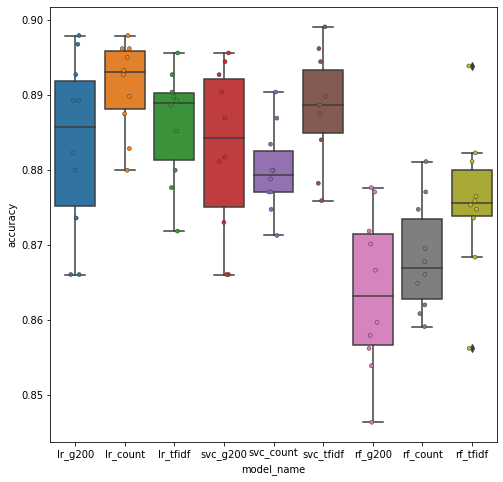

In [73]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=4, jitter=True, edgecolor="gray", linewidth=0.5)
plt.show()

In [74]:
cv_df.groupby('model_name').accuracy.mean()

model_name
lr_count     0.891188
lr_g200      0.883420
lr_tfidf     0.886145
rf_count     0.868348
rf_g200      0.863768
rf_tfidf     0.875826
svc_count    0.880000
svc_g200     0.882841
svc_tfidf    0.888290
Name: accuracy, dtype: float64

## Comments to Score 

In [75]:
df_test = pd.read_csv('comments_to_score.csv',low_memory = False) 

In [76]:
df_test

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...
...,...,...
7532,504235362,"Go away, you annoying vandal."
7533,504235566,This user is a vandal.
7534,504308177,""" \n\nSorry to sound like a pain, but one by f..."
7535,504570375,Well it's pretty fucking irrelevant now I'm un...


### Add Cleaned Text to Data Frame

In [77]:
def text_process_2(text):
    
    # Replace the xa0 with a space
    text=text.replace('xa0',' ')
 
    # Replace the \xa0 with a space
    text=text.replace('\xa0',' ')
    
    # Replace the \n\n with a space
    text=text.replace('\n\n',' ')
    
    # Replace the \n with a space
    text=text.replace('\n',' ')
    
    # Replace apostrophes with nothing
    text=text.replace('\'','')
    
    # Replace http with a space
    text=text.replace('http','')
    
     # Replace hyphen with a space
    text=text.replace('-',' ')
    
    
    tokens = nltk.word_tokenize(text)
    
    cleaned_words=[w.lower() for w in tokens if w.isalnum()]
    
    
    #remove any words that are actually digits. 
    no_integers = [x for x in cleaned_words if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    
    no_integers = ' '.join(no_integers)
    
    return no_integers

In [78]:
import time
t_start = time.time()

df_test['clean']=df_test['text'].apply(lambda x: text_process_2(x))


t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 3.147 seconds


In [79]:
import time
t_start = time.time()

df_test['w2v_count']=df_test['clean'].apply(lambda x: w2v_count(x))
# df_small['sent_vec_2']=df_small['clean'].apply(lambda x: sent_vectorizer_2(x))
# df_small['sent_vec_3']=df_small['clean'].apply(lambda x: sent_vectorizer_3(x))
# df_small['sent_vec_4']=df_small['clean'].apply(lambda x: sent_vectorizer_4(x))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 0.481 seconds


In [80]:
import time
t_start = time.time()

df_test['sent_vec_1']=df_test['clean'].apply(lambda x: sent_vectorizer_1(x))
# df_small['sent_vec_2']=df_small['clean'].apply(lambda x: sent_vectorizer_2(x))
# df_small['sent_vec_3']=df_small['clean'].apply(lambda x: sent_vectorizer_3(x))
# df_small['sent_vec_4']=df_small['clean'].apply(lambda x: sent_vectorizer_4(x))

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 0.703 seconds


In [81]:
X_test=df_test['sent_vec_1']

In [82]:
import time
t_start = time.time()

df_test_fin=pd.DataFrame()


for idx, row in enumerate(X_test):
    #print((roww))
    #print(list(roww))
    row_df=pd.Series(X_test[idx]).to_frame()
    row_df_2=row_df.T
    df_test_fin=pd.concat([df_test_fin, row_df_2])
    #row_df= pd.DataFrame(roww)
#     row_df_2=row_df.T
#     ddd=pd.concat([ddd, row_df_2])
    
t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 7.806 seconds


In [83]:
test_ids=df_test['comment_id']

In [84]:
Y_test_pred=lr_g200.predict_proba(df_test_fin)

In [85]:
# utility function to create submission csv for further predictions
def create_submission_df(test_ids, predictions):
    columns = ['class_'+str(x) for x in range(1,3)]
    predictions_df = pd.DataFrame(predictions, columns=columns)
    submission_df = pd.concat([test_ids, predictions_df], axis=1)
    return submission_df

In [86]:
submission_df = create_submission_df(test_ids, Y_test_pred)
submission_df.pop('class_1')
submission_df.head()

,comment_id,class_2
0,114890,0.324380
1,732895,0.595793
2,1139051,0.439160
3,1434512,0.240897
4,2084821,0.864743


In [87]:
submission_df.columns=['comment_id', 'score']
submission_df.head()

,comment_id,score
0,114890,0.324380
1,732895,0.595793
2,1139051,0.439160
3,1434512,0.240897
4,2084821,0.864743


In [88]:
submission_df.to_csv('submission.csv', index=False)